In [1]:
print('import libraries Pandas  and numpy')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import libraries Pandas  and numpy


In [2]:
##Read csv file for 2016, 2017, 2018, 2019, 2020 and 2021 years
print('download datframes for Chicago crimes as csv files  for 2016, 2017, 2018, 2019, 2020 and 2021 years')
dat_2016 = pd.read_csv("../data/2016_crime.csv")
dat_2017 = pd.read_csv("../data/2017_crime.csv")
dat_2018 = pd.read_csv("../data/2018_crime.csv") 
dat_2019 = pd.read_csv("../data/2019_crime.csv") 
dat_2020 = pd.read_csv("../data/2020_crime.csv")
dat_2021= pd.read_csv("../data/2021_crime.csv")

download datframes for Chicago crimes as csv files  for 2016, 2017, 2018, 2019, 2020 and 2021 years


In [3]:
## building function to great a new dataframe consisting of just two featurs,distrcts and primary_type
def extrat_featur (arg):
    data=arg[['district','primary_type']]
    return data
print('new shape data for 2016')
new_shape_data_2016= extrat_featur(dat_2016)
print('new shape data for 2017 dataframe')
new_shape_data_2017=extrat_featur(dat_2017)
print('new shape data for 2018dataframe ')
new_shape_data_2018=extrat_featur(dat_2018)
print('new shape data for 2019 dataframe')
new_shape_data_2019=extrat_featur(dat_2019)
print('new shape data for 2020 dataframe')
new_shape_data_2020=extrat_featur(dat_2020)
print('new shape data for 2021 dataframe')
new_shape_data_2021=extrat_featur(dat_2021)


new shape data for 2016
new shape data for 2017 dataframe
new shape data for 2018dataframe 
new shape data for 2019 dataframe
new shape data for 2020 dataframe
new shape data for 2021 dataframe


In [4]:
## build function to get the unique of primary_type and district
print('building function to find out the unique district and  primary_type of crimes')
#def uniq_data (df_dat): 
    #get_uniq_data= df_dat.unique()
    #return get_uniq_data
    # print(get_uniq_data)
    
#print('the unique district and primary_type for 2016')
#uniq_district_2016 =uniq_data(dat_2016['district']) 
# uniq_primary_type_2016=uniq_data (dat_2016['primary_type'])    
# print('the unique district and primary_type for 2017')
# uniq_district_2017=uniq_data (dat_2017['district']) 
# uniq_primary_type_2017=uniq_data (dat_2017['primary_type']) 
# print('the unique district and primary_type for 2018')
# uniq_district_2018=uniq_data (dat_2018['district']) 
# uniq_primary_type_2018=uniq_data (dat_2018['primary_type'])    
# print('the unique district and primary_type for 2019')
# uniq_district_2019=uniq_data (dat_2019['district']) 
# uniq_primary_type_2019=uniq_data (dat_2019['primary_type'])

# print('the unique district and primary_type for 2020')
# uniq_district_2020=uniq_data (dat_2020['district'])
# uniq_primary_type_2020=uniq_data (dat_2020['primary_type'])
# print('the unique district and primary_type for 2021')
# uniq_district_2021=uniq_data (dat_2021['district'])
# uniq_primary_type_2021=uniq_data (dat_2021['primary_type'])


building function to find out the unique district and  primary_type of crimes


In [5]:
##build function to group primary_type and district
print('building function to group number of crimes per district')
def grop_dat (df):
    group_crim_distr=df.groupby(['district'])[['primary_type']].count()
    return group_crim_distr
  
    
print('grouping number of crimes per each distric in 2016')
grouped_crim_per_dist_2016=grop_dat(new_shape_data_2016)
##print(grouped_crim_per_dist_2016)

print('grouping number of crimes per eachdistric in 2017')
grouped_crim_per_dist_2017=grop_dat(new_shape_data_2017) 
#print(grouped_crim_per_dist_2017)

print('grouping number of crimes per each distric in 2018') 
grouped_crim_per_dist_2018=grop_dat(new_shape_data_2018)
#print(grouped_crim_per_dist_2018)

print('grouping number of crimes per each distric in 2019')
grouped_crim_per_dist_2019=grop_dat(new_shape_data_2019)
#print(grouped_crim_per_dist_2019)

print('grouping number of crimes per each distric in 2020')
grouped_crim_per_dist_2020=grop_dat(new_shape_data_2020)
#print(grouped_crim_per_dist_2020)

print('grouping number of crimes per each distric in 2021')
grouped_crim_per_dist_2021=grop_dat(new_shape_data_2021)
#print(grouped_crim_per_dist_2021)

building function to group number of crimes per district
grouping number of crimes per each distric in 2016
grouping number of crimes per eachdistric in 2017
grouping number of crimes per each distric in 2018
grouping number of crimes per each distric in 2019
grouping number of crimes per each distric in 2020
grouping number of crimes per each distric in 2021


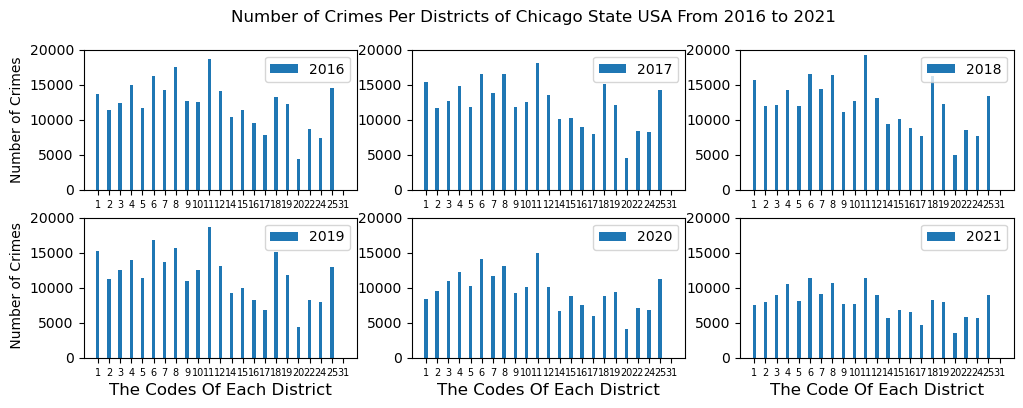

In [6]:
## initializing data for plotting and visualizing the number of crime per district for
## the years 2016,2017,2018,2019,2020 and 2021

fig, ((ax1,ax2,ax3,),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(12,4))

# Plotting for year 2016
districts_2016=grouped_crim_per_dist_2016.index.to_list()
y1=np.array(grouped_crim_per_dist_2016['primary_type'])
x1=np.arange(len(y1))
ax1.bar(x1,y1,width=0.3,label='2016')
ax1.set_xticks(x1)
ax1.set_xticklabels(districts_2016,rotation=0,fontsize=7)
ax1.set_ylabel('Number of Crimes')
ax1.legend()
ax1.set_ylim(0,20000)

# Plotting for year 2017
districts_2017=grouped_crim_per_dist_2017.index.to_list()
districts_2017=list(map(int,districts_2017))
y2=np.array(grouped_crim_per_dist_2017['primary_type'])
x2=np.arange(len(y2))
ax2.bar(x2,y2,width=0.3,label='2017')
ax2.set_xticks(x2)
ax2.set_xticklabels(districts_2017,rotation=0,fontsize=7)
#ax2.set_ylabel('Number of primary_type of Crimes for per distict')
ax2.legend()
ax2.set_ylim(0,20000)

# Plotting for year 2018
districts_2018=grouped_crim_per_dist_2018.index.to_list()
y3=np.array(grouped_crim_per_dist_2018['primary_type'])
x3=np.arange(len(y3))
ax3.bar(x3,y3,width=0.3,label='2018')
ax3.set_xticks(x3)
ax3.set_xticklabels(districts_2018,rotation=0,fontsize=7)
#ax3.set_ylabel('Number of primary_type of Crimes for per distict')
ax3.legend()
ax3.set_ylim(0,20000)

# Plotting for year 2019
districts_2019= grouped_crim_per_dist_2019.index.to_list()
y4=np.array(grouped_crim_per_dist_2019['primary_type'])
x4=np.arange(len(y4))
ax4.bar(x4,y4,width=0.3,label='2019')
ax4.set_ylabel(' Number of Crimes')
ax4.set_xticks(x4)
ax4.set_xticklabels(districts_2019,rotation=0,fontsize=7)
ax4.set_xlabel('The Codes Of Each District',fontsize=12)
ax4.legend()
ax4.set_ylim(0,20000)

# Plotting for year 2020
districts_2020=grouped_crim_per_dist_2020.index.to_list()
y5=np.array(grouped_crim_per_dist_2020['primary_type'])
x5=np.arange(len(y5))
ax5.bar(x5,y5,width=0.3,label='2020')
ax5.set_xticks(x5)
ax5.set_xticklabels(districts_2020,rotation=0,fontsize=7)
#ax5.set_ylabel('Number of primary_type of Crimes for per distict')
ax5.set_xlabel('The Codes Of Each District',fontsize=12)
ax5.legend()
ax5.set_ylim(0,20000)

# Plotting for year 2021
districts_2021=grouped_crim_per_dist_2021.index.to_list()
y6=np.array(grouped_crim_per_dist_2021['primary_type'])
x6=np.arange(len(y6))
ax6.bar(x6,y6,width=0.3,label='2021')
ax6.set_xticks(x6)
ax6.set_xticklabels(districts_2021,rotation=0,fontsize=7)
#ax6.set_ylabel(' Number of primary_type of Crimes for per distict')
ax6.set_xlabel('The Code Of Each District',fontsize=12)
ax6.legend()
ax6.set_ylim(0,20000)

fig.suptitle('Number of Crimes Per Districts of Chicago State USA From 2016 to 2021',fontsize=12)
plt.show()


## Observation
Through the years 2016, 2017, and 2018, the trend of crimes in most of districts had not faced a big change,almost similar, while, in 2018, the figures of crimes for district codes one and 18 increased up to 15700 and 16222 after they were around 13735 and 13250, in previous two years respectively. Unlikely,The three figures for years during Covid -19 show a noticeable decrease in the level of crimes in all districts, particularly in the areas with the largest-scale  of criminal activities from more than 18000 in 2019 to less than 16000 and 12000 crime in 2020 and 2021 respectively.

In [7]:
## calculating the percent change of the primary_type of crimes per distric for 
##                                        1- Among the three years befor Covid-19 (2016,2017,and 2018) 
##                                        2- Between the years 2018 and biging of covid 2019
##                                        3- Among the three years during Covid-19 (2019,2020,and 2021)

    
## Between the years (2016,2017)
print('percent change of crimes Between the years (2016,2017) ')
#districts_2017=list(map(int,districts_2017))
grouped_crim_per_dist_2017['Percent_Change_of_crime_2017']=(((grouped_crim_per_dist_2017['primary_type']-grouped_crim_per_dist_2016['primary_type'])/grouped_crim_per_dist_2016['primary_type'])*100)
#print(grouped_crim_per_dist_2017)


## Between the years (2017,2018)
print('percent change of crimes Between the years(2017,2018)')
grouped_crim_per_dist_2018['Percent_Change_of_crime_2018']=(((grouped_crim_per_dist_2018['primary_type']-grouped_crim_per_dist_2017['primary_type'])/grouped_crim_per_dist_2017['primary_type'])*100)
#print(grouped_crim_per_dist_2018)

## Between the years (2018,2019)
print('percent change of crimes Between the years(2018,2019)')
grouped_crim_per_dist_2019['Percent_Change_of_crime_2019']=(((grouped_crim_per_dist_2019['primary_type']-grouped_crim_per_dist_2018['primary_type'])/grouped_crim_per_dist_2018['primary_type'])*100)
#print(grouped_crim_per_dist_2019)

## Between the years (2019, 2020)
print('percent change of crimes Between the years(2019,2020)')
grouped_crim_per_dist_2020['Percent_Change_of_crime_2020']=(((grouped_crim_per_dist_2020['primary_type']-grouped_crim_per_dist_2019['primary_type'])/grouped_crim_per_dist_2019['primary_type'])*100)
#print(grouped_crim_per_dist_2020)

## Between the years (2020,2021)
print('percent change of crimes Between the years(2020,2021)')
grouped_crim_per_dist_2021['Percent_Change_of_crime_2021']=(((grouped_crim_per_dist_2021['primary_type']-grouped_crim_per_dist_2020['primary_type'])/grouped_crim_per_dist_2020['primary_type'])*100)
#print(grouped_crim_per_dist_2021)



percent change of crimes Between the years (2016,2017) 
percent change of crimes Between the years(2017,2018)
percent change of crimes Between the years(2018,2019)
percent change of crimes Between the years(2019,2020)
percent change of crimes Between the years(2020,2021)


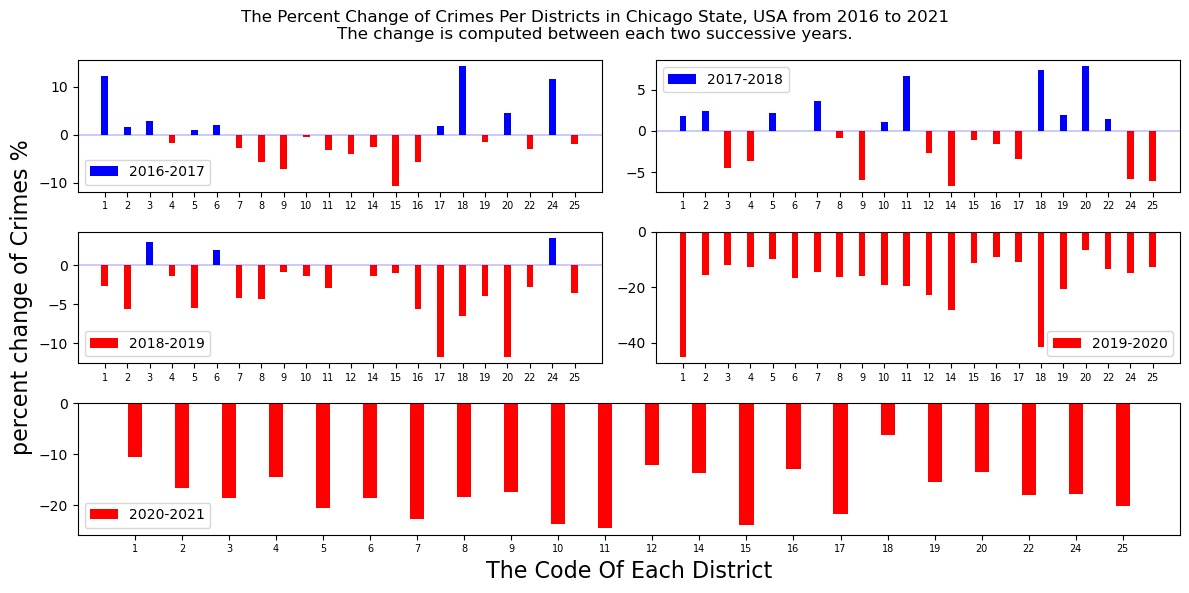

In [8]:
## initializing data for plotting and visualizing percent change of crimes for the years from 2016 to 2021 included

fig = plt.figure(figsize=(12,6))

## Plotting Pecent Change Between the Years (2016,2017)
districts_2017=grouped_crim_per_dist_2017.index[:-1].to_list() # grouped_crim_per_dist_2017.index.to_list()
districts_2017=list(map(int,districts_2017))
y1=np.array(grouped_crim_per_dist_2017.iloc[:-1]['Percent_Change_of_crime_2017'])
x1=np.arange(len(y1))

#ax1 = plt.subplot(3,2,1)
ax1 = plt.subplot2grid((3,2), (0,0))

ax1.bar(x1,y1,width=0.3,label='2016-2017',color=np.where(y1>0, 'b', 'r'))
ax1.axhline(y=0, color='b', linestyle='-',linewidth=0.3)
ax1.set_xticks(x1)
ax1.set_xticklabels(districts_2017,rotation=0,fontsize=7)
#ax1.set_ylabel('percentage cahange of Crimes')
ax1.legend()
#ax1.set_ylim(0,20000)

## Plotting Pecent Change Between the Years (2017,2018)
districts_2018=grouped_crim_per_dist_2018.index[:-1].to_list() #grouped_crim_per_dist_2018.index.to_list()
y2=np.array(grouped_crim_per_dist_2018.iloc[:-1]['Percent_Change_of_crime_2018'])
x2=np.arange(len(y2))
#ax2 = plt.subplot(3,2,2)
ax2 = plt.subplot2grid((3,2), (0,1))

ax2.bar(x2,y2,width=0.3,label='2017-2018',color=np.where(y2>0, 'b', 'r'))
ax2.axhline(y=0, color='b', linestyle='-',linewidth=0.3)
ax2.set_xticks(x2)
ax2.set_xticklabels(districts_2018,rotation=0,fontsize=7)
#ax2.set_ylabel('percentage cahange of Crimes')
ax2.legend()

## Plotting Pecent Change Between the Years (2018,2019)
districts_2019=grouped_crim_per_dist_2019.index[:-1].to_list() #grouped_crim_per_dist_2019.index.to_list()
y3=np.array(grouped_crim_per_dist_2019.iloc[:-1]['Percent_Change_of_crime_2019'])
x3=np.arange(len(y3))
#ax3 = plt.subplot(3,2,3)
ax3 = plt.subplot2grid((3,2), (1,0))

ax3.bar(x3,y3,width=0.3,label='2018-2019',color=np.where(y3>0, 'b', 'r'))
ax3.axhline(y=0, color='b', linestyle='-',linewidth=0.3)
ax3.set_xticks(x3)
ax3.set_xticklabels(districts_2019,rotation=0,fontsize=7)
ax3.set_ylabel('percent change of Crimes %',fontsize=16)
ax3.legend()

## Plotting Pecent Change Between the Years (2019,2020)
districts_2020=grouped_crim_per_dist_2020.index[:-1].to_list() #grouped_crim_per_dist_2020.index.to_list()
y4=np.array(grouped_crim_per_dist_2020.iloc[:-1]['Percent_Change_of_crime_2020'])
x4=np.arange(len(y4))
#ax4 = plt.subplot(3,2,4)
ax4 = plt.subplot2grid((3,2), (1,1))

ax4.bar(x4,y4,width=0.3,label='2019-2020',color=np.where(y4>0, 'b', 'r'))
ax4.axhline(y=0, color='b', linestyle='-',linewidth=0.3)
ax4.set_xticks(x4)
ax4.set_xticklabels(districts_2020,rotation=0,fontsize=7)
#ax4.set_ylabel('percentage cahange of Crimes')
ax4.legend()

## Plotting Pecent Change Between the Years (2020,2021)
districts_2021=grouped_crim_per_dist_2021.index[:-1].to_list() #grouped_crim_per_dist_2021.index.to_list()
y5=np.array(grouped_crim_per_dist_2021.iloc[:-1]['Percent_Change_of_crime_2021'])
x5=np.arange(len(y5))
#ax5 = plt.subplot(3,2,5)
ax5 = plt.subplot2grid((3,2), (2,0), colspan=2)
ax5.bar(x5,y5,width=0.3,label='2020-2021',color=np.where(y5>0, 'b', 'r'))
ax5.axhline(y=0, color='b', linestyle='-',linewidth=0.3)

ax5.set_xticks(x5)
ax5.set_xticklabels(districts_2021,rotation=0,fontsize=7)
#ax5.set_ylabel(' percentage cahange of Crimes')
ax5.set_xlabel('The Code Of Each District',fontsize=16)
ax5.legend()
plt.suptitle('The Percent Change of Crimes Per Districts in Chicago State, USA from 2016 to 2021'
             '\nThe change is computed between each two successive years.',fontsize=12)
fig.tight_layout()
plt.show()


## Observation
The first two figures, which represented the duration before Covid- 19, show a slight difference in an increase or decrease percent change of crimes. However,  it has reduced for the following three periods of years, during Covid -19, especially for the interval of (2019-2020) witnessed a noticeable decrease of percent change of crime level.